## Introduction

In this notebook we will use classic statistical techniques such as linear regression to explore the fundamentals of fitting a model. We will start with problems involving regression and classification in low dimensional spaces (1D or 2D spaces that can be visualized easily) and then get a glimse of how to think about problems in higher dimensions. We will try to build intuitions that can help us model more complicated data such as human speech, pictures, and robinhood users.

## Linear regression

Lets take a look at a problem where two variables are linearly related to each other. An example of such a dataset can be temperature records in Celcius and Fahrenheit. Say you dont know the exact formula for converting temperature from Celcius to Fahrenheit, how can you figure out the formula by yourself? We can use linear regression to learn this relationship from data. Lets collect this data by going to several weather websites that give us temperature in both units. The cell below shows data collected by me on July 22nd 2017 from the website https://www.wunderground.com/. 

In [2]:
temperatures = [
    {"city": "San Francisco", "celcius": 23.6, "fahrenheit": 74.2},
    {"city": "New York", "celcius": 31.6, "fahrenheit": 88.9},
    {"city": "Chicago", "celcius": 29.3, "fahrenheit": 84.7},
    {"city": "Houston", "celcius": 34.2, "fahrenheit": 94.8},
    {"city": "Boston", "celcius": 22.3, "fahrenheit": 72.1},
    {"city": "Palo Alto", "celcius": 23.0, "fahrenheit": 73.4},
    {"city": "Antarctica", "celcius": -4, "fahrenheit": 25}
]

Lets convert this python dictionary into a data frame that can be manipulated easily by us

In [3]:
import pandas as pd
data = pd.DataFrame(temperatures)

In [4]:
# The variable data stores a table as shown below
data

,celcius,city,fahrenheit
0,23.6,San Francisco,74.2
1,31.6,New York,88.9
2,29.3,Chicago,84.7
3,34.2,Houston,94.8
4,22.3,Boston,72.1
5,23.0,Palo Alto,73.4
6,-4.0,Antarctica,25.0


I will switch between python and R to perform different tasks. I am more familiar with R for statistical modeling and visualization, while I use python as my programming language of choice for building complex application and for writing small scripts to prepare data. Jupyter makes this switching between languages really easy

In [5]:
# This enables the magic switching between R and python
%load_ext rpy2.ipython

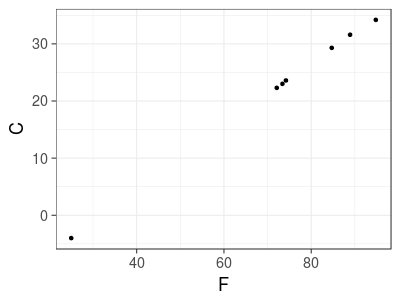

In [6]:
%%R -w 400 -h 300 -i data
library("ggplot2")

p = ggplot(data)
p = p + geom_point(aes(x=fahrenheit, y=celcius))
p = p + theme_bw(base_size=18) + xlab("F") + ylab("C")
print(p)

The figure above clearly shows that the relationship between C and F is linear. A linear relationship can be represented by an equation of the form $\hat{C}_i = \alpha + \beta \cdot F_i$. The term $\hat{C}_i$ represents the predicted value of $C_i$, this is generally pronounced `c hat`. The subscript $i$ represents the $i^\text{th}$ sample in the training set. The terms $\alpha$ and $\beta$ are tunable parameters that are learned from the data.

Different values of $\alpha$ and $\beta$ leads to different prediction of C from a given F. We chose the value of $\alpha$ and $\beta$ that minimizes the sum of prediction error ($(C_i - \hat{C}_i)^2$) over each sample in our dataset. This process of finding $\alpha$, and $\beta$ that minimizes the prediction error is called learning parameters from data, or learning in short.

We can learn these parameters using different techniques. The classical method of solving this equation is called least squares method. It is easy to derive this method if we view the equation $\hat{C_i} = \alpha + \beta \cdot F$ differently. The equation states that
$$ \hat{C}_1 = \alpha + \beta \cdot F_1$$
$$ \hat{C}_2 = \alpha + \beta \cdot F_2$$
$$ \hat{C}_3 = \alpha + \beta \cdot F_3$$
$$ \hat{C}_4 = \alpha + \beta \cdot F_4$$

This is equivalent to the following matrix equation

$$\begin{bmatrix}
\hat{C}_1\\
\hat{C}_2\\
\hat{C}_3\\
\hat{C}_4\\
\end{bmatrix} = \begin{bmatrix}
1 & F_1 \\
1 & F_2 \\
1 & F_3 \\
1 & F_4 \\
\end{bmatrix} \cdot
\begin{bmatrix}
\alpha \\
\beta
\end{bmatrix}$$

or

$$\mathbf{\hat{C} = F \cdot W}$$
Now we want to minimize the error($e$) where $e = \mathbf{(C - \hat{C})^T \cdot (C - \hat{C})}$. From basic calculus we know that to find the parameter $W$ that minimizes the error $e$ we set $\frac{\partial e}{\partial W} = 0$.
$$
\begin{align}
\frac{\partial e}{\partial W} &= 0\\
\frac{\partial e}{\partial \hat{C}} \cdot \frac{\partial \hat{C}}{\partial W} &= 0\\
(C - \hat{C})^T \cdot F &= 0\\
F^T \cdot (C - \hat{C}) &= 0\\
F^T \cdot \hat{C} &= F^T \cdot C\\
F^T \cdot F \cdot W &= F^T \cdot C\\
W &= (F^T \cdot F)^{-1} \cdot F^T \cdot C\\
\end{align}
$$

In [7]:
%%R -i data
model = lm(celcius ~ fahrenheit, data=data)
print(summary(model))


Call:
lm(formula = celcius ~ fahrenheit, data = data)

Residuals:
       0        1        2        3        4        5        6 
 0.24548  0.12171  0.14279 -0.53886  0.10602  0.08759 -0.16473 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.651214   0.398380  -44.31 1.11e-07 ***
fahrenheit    0.552638   0.005219  105.88 1.42e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2939 on 5 degrees of freedom
Multiple R-squared:  0.9996,	Adjusted R-squared:  0.9995 
F-statistic: 1.121e+04 on 1 and 5 DF,  p-value: 1.425e-09



This shows that $\hat{C} = -14.82674 + 0.51958 \cdot F$. We can check how good this prediction is by plotting the predicted linear relationship along side our data

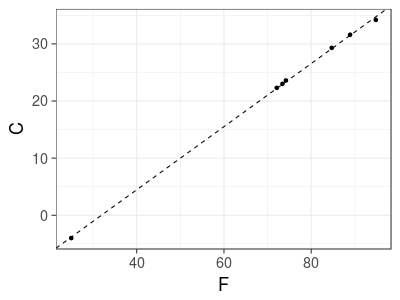

In [8]:
%%R -w 400 -h 300 -i data
p = ggplot(data)
p = p + geom_point(aes(x=fahrenheit, y=celcius))
p = p + geom_abline(intercept=-17.651214, slope=0.552638, linetype="dashed")
p = p + theme_bw(base_size=18) + xlab("F") + ylab("C")
print(p)

The prediction by our equation $\hat{C} = -14.82674 + 0.51958 * F$ is really good and fits the data quite well. Though the prediction is good, it is not quite perfect and we can see some small errors. These errors may arise due to the fact that reported temperatures on websites are rounded to one decimal place and this contain some rounding error from the start.

The true relationship between Celcius and Fahrenheit is well known and a quick google search shows us that the true relationship is $C = -32 \cdot \frac{5}{9} + \frac{5}{9} \cdot F$. Lets see how close our prediction is to this true relationship.

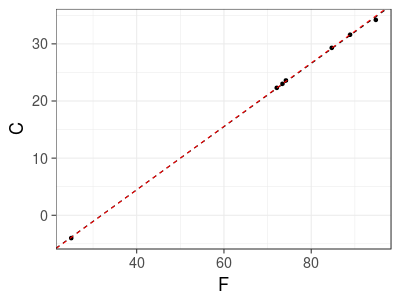

In [9]:
%%R -w 400 -h 300 -i data
p = ggplot(data)
p = p + geom_point(aes(x=fahrenheit, y=celcius))
p = p + geom_abline(intercept=-17.651214, slope=0.552638, linetype="dashed")
p = p + geom_abline(intercept=-32 * 5 / 9, slope=5 / 9, linetype="dashed", color="red")
p = p + theme_bw(base_size=18) + xlab("F") + ylab("C")
print(p)

## Learning as optimization in parameter space

In this case we derived a closed form equation to learn the values of parameters from data  (least squares solution). Such closed form solutions can only be found for simple problems. As we learn more about machine learning, we will encounter problems where such closed form equations do not exist. In these cases we need to use some general optimization procedures that can find the weights even when the error function is complicated. To understand how these methods work lets see how the total error depends on values of $\alpha$ and $\beta$.

In [10]:
%matplotlib notebook

<IPython.core.display.Javascript object>


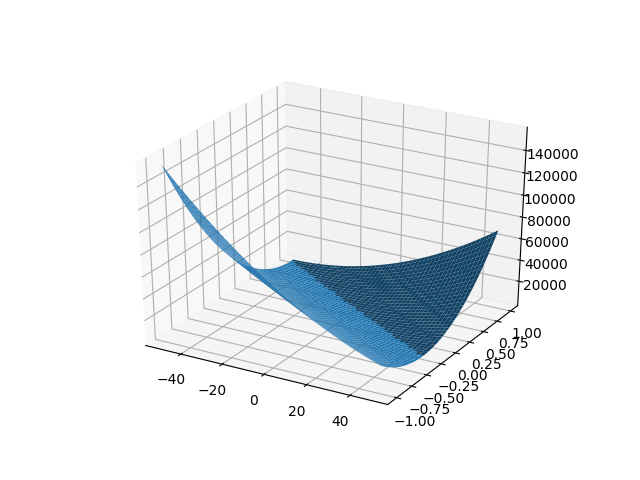

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

alphas = np.arange(-50, 50,0.1)
betas = np.arange(-1,1,0.01)

X = np.zeros((len(alphas), len(betas)))
Y = np.zeros((len(alphas), len(betas)))
Z = np.zeros((len(alphas), len(betas)))

F = np.array(
    [
        [1, x["fahrenheit"]]
        for x in temperatures
    ]
)
C = np.array([x["celcius"] for x in temperatures])
for i, alpha in enumerate(alphas):
    for j, beta in enumerate(betas):
        X[i,j] = alpha
        Y[i,j] = beta
        W = np.array([alpha, beta])
        error = C - F.dot(W)
        Z[i,j] = error.dot(error)
        
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

One common procedure to find the minimum value of a function is Stochastic gradient descent (SGD). In SGD we start with a random guess for our parameters, then go through the training examples one by one. We compute the gradient of the error at each example and take a small step opposite to the gradient of the error. This can be imagined as standing at a point on the error surface above and taking a small step down in the direction of steepest slope. If this procedure is repeated enough number of times we will climb down the surface to its lowest point which is the point where the error is minimum.

In our case for a given $\alpha_i$ and $\beta_i$ (i denotes the $i^{\text{th}}$ iteration of the procedure) and sample from our training set (f, c) the error($e$) is $(c - \alpha_i -\beta_i \cdot f)^2$. So the derivatives with respect to our parameters are $\frac{\partial e}{\partial \alpha_i} = -2 \cdot (c - \alpha_i -\beta_i \cdot f)$, $\frac{\partial e}{\partial \beta_i} = -2 \cdot (c - \alpha_i -\beta_i \cdot f) \cdot f$

In [52]:
alpha = 0
beta = 0
num_steps = 100000
step_size = 0.0001
for i in range(num_steps):
    total_error = 0
    for d in temperatures:
        e = d["celcius"] - alpha - beta * d["fahrenheit"]
        grad_alpha = -2 * e
        grad_beta = -2 * e * d["fahrenheit"]
        alpha -= step_size * grad_alpha
        beta -= step_size * grad_beta
        total_error += e**2
    if i % 5000 == 0:
        print("iter {}: {}, {} - error = {}".format(i, alpha, beta, total_error))
print("Final: alpha={}, beta={}".format(alpha, beta))

iter 0: 0.0017379153022918756, 0.2545726259027964 - error = 726.4650997779675
iter 5000: -6.976486148770978, 0.3724714458206168 - error = 74.8238664499143
iter 10000: -11.155404798850284, 0.4430668658402823 - error = 26.958505484199744
iter 15000: -13.65795565356054, 0.48534302469910334 - error = 10.145431556859455
iter 20000: -15.15661147934257, 0.5106601572745351 - error = 4.326997359951969
iter 25000: -16.054083464746302, 0.5258213549600312 - error = 2.3668024803012133
iter 30000: -16.591535727452552, 0.534900657861883 - error = 1.739543761867961
iter 35000: -16.91338971218519, 0.5403378101828004 - error = 1.5599346698939547
iter 40000: -17.10613238846791, 0.5435938559035358 - error = 1.5226747985427378
iter 45000: -17.22155659019555, 0.5455437431073089 - error = 1.525572601352381
iter 50000: -17.29067852313449, 0.5467114355887843 - error = 1.536349168797027
iter 55000: -17.332072282343717, 0.5474107097461104 - error = 1.5460451165299893
iter 60000: -17.356860988743957, 0.5478294709

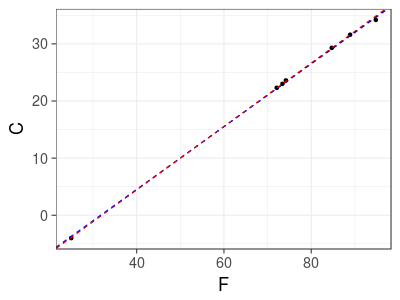

In [53]:
%%R -w 400 -h 300 -i data
p = ggplot(data)
p = p + geom_point(aes(x=fahrenheit, y=celcius))
p = p + geom_abline(intercept=-17.651214, slope=0.552638, linetype="dashed")
p = p + geom_abline(intercept=-17.393254431510222, slope=0.548437348147744, linetype="dashed", color="blue")
p = p + geom_abline(intercept=-32 * 5 / 9, slope=5 / 9, linetype="dashed", color="red")
p = p + theme_bw(base_size=18) + xlab("F") + ylab("C")
print(p)

The key to any learning problem is to find the parameters that minimizes error. It is often useful to imagine the error surface in the parameter space and then thinking about an optimization algorithm that can help us find the lowest point on this surface. Stochastic gradient descent is a very simple idea that can take us very far. As we go along and try to solve more complicated problems we will learn other optimization methods that perform better, but almost everything requires us to think of error as a function of parameters.

Always remember that machine learning can be summed up in one equation
$$\Delta w_i = -\alpha \cdot \frac{\partial E}{\partial w_i}$$

## Geometric transformation view of learning

What if the Y is not a linear function of X. Say we want to find the formula to compute the volume of a sphere as a function of its radius. We can measure the volume by measuring the amount of water it displaces etc. So say we construct 10 spheres of radius 0.5cm, 1cm, 1.5cm, 2cm, 2.5cm, 3cm, 3.5cm, 4cm, 4.5cm, 5cm and say we measured that the volume of water displaced by these spheres is $0.52 {\text{cm}}^3, 4.19 {\text{cm}}^3, 14.14 {\text{cm}}^3, 33.51 {\text{cm}}^3, 65.45 {\text{cm}}^3, 113.10 {\text{cm}}^3, 179.59 {\text{cm}}^3, 268.08 {\text{cm}}^3, 381.70 {\text{cm}}^3, 523.60 {\text{cm}}^3$

In [59]:
volume_data = pd.DataFrame(
    [
        {"radius": 0.5, "volume": 0.52},
        {"radius": 1.0, "volume": 4.19},
        {"radius": 1.5, "volume": 14.14},
        {"radius": 2.0, "volume": 33.51},
        {"radius": 2.5, "volume": 65.45},
        {"radius": 3.0, "volume": 113.10},
        {"radius": 3.5, "volume": 179.59},
        {"radius": 4.0, "volume": 268.08},
        {"radius": 4.5, "volume": 381.70},
        {"radius": 5.0, "volume": 523.60},
    ]
)

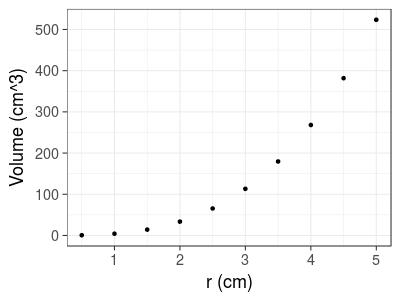

In [60]:
%%R -w 400 -h 300 -i volume_data
p = ggplot(volume_data)
p = p + geom_point(aes(x=radius, y=volume))
p = p + theme_bw(base_size=18) + xlab("r (cm)") + ylab("Volume (cm^3)")
print(p)

In [61]:
volume_data["r3"] = [x**3 for x in volume_data["radius"]]

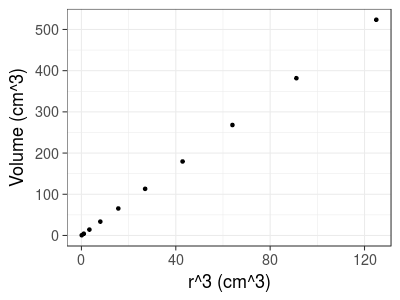

In [64]:
%%R -w 400 -h 300 -i volume_data
p = ggplot(volume_data)
p = p + geom_point(aes(x=r3, y=volume))
p = p + theme_bw(base_size=18) + xlab("r^3 (cm^3)") + ylab("Volume (cm^3)")
print(p)

In [65]:
%%R -w 400 -h 300 -i volume_data
model = lm(volume ~ r3, data=volume_data)
print(summary(model))


Call:
lm(formula = volume ~ r3, data = volume_data)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0036898 -0.0020872  0.0002341  0.0025229  0.0031647 

Coefficients:
              Estimate Std. Error    t value Pr(>|t|)    
(Intercept) -1.770e-04  1.210e-03     -0.146    0.887    
r3           4.189e+00  2.176e-05 192509.939   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.002805 on 8 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 3.706e+10 on 1 and 8 DF,  p-value: < 2.2e-16



In [12]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, TensorDataset, DataLoader

In [83]:
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.layer1 = nn.Linear(1, 10)
        self.layer2 = nn.Linear(10, 10)
        self.layer3 = nn.Linear(10, 1)
        self.layer4 = nn.Linear(1, 1)
    
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = self.layer3(x)
        x = self.layer4(x)
        return x
    
    def get_last_layer(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = self.layer3(x)
        return x

In [84]:
net = SimpleNet()
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.00000001)

In [85]:
radius = torch.FloatTensor(torch.arange(0.5, 10, 0.5))
radius.unsqueeze_(1)
volume = 4.0 / 3.0 * 3.142 * radius**3

In [86]:
dataset = TensorDataset(radius, volume)
loader = DataLoader(dataset, batch_size=10, shuffle=True)

In [88]:
for epoch in range(50000):
    total_loss = 0
    for rad, vol in loader:
        x = Variable(rad)
        y = Variable(vol)
        optimizer.zero_grad()
        out = net(x)
        loss = criterion(out, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.data[0]
    if epoch % 500 == 0:
        print("{}, {}".format(epoch, total_loss))

0, 688267.109375
500, 670197.75
1000, 655156.5
1500, 638195.71875
2000, 640065.09375
2500, 593666.4375
3000, 581748.3125
3500, 582011.4375
4000, 555261.84375
4500, 550812.1875
5000, 522854.890625
5500, 501122.875
6000, 472351.734375
6500, 426113.015625
7000, 390873.8828125
7500, 371318.203125
8000, 325805.6875
8500, 279898.46875
9000, 249877.8828125
9500, 211802.453125
10000, 179968.00390625
10500, 148952.796875
11000, 122323.00390625
11500, 103285.83984375
12000, 83695.64453125
12500, 73402.93359375
13000, 63779.34765625
13500, 56932.240234375
14000, 48768.865234375
14500, 44006.6015625
15000, 39101.814453125
15500, 34043.185546875
16000, 30937.67822265625
16500, 28440.93115234375
17000, 27484.8232421875
17500, 24468.6171875
18000, 23231.3642578125
18500, 23002.142578125
19000, 20789.052734375
19500, 20756.4033203125
20000, 18826.28662109375
20500, 17697.6484375
21000, 15996.90625
21500, 15739.55517578125
22000, 14916.800048828125
22500, 14004.3857421875
23000, 12112.5166015625
23500,

In [89]:
prediction = net(Variable(radius))

In [90]:
df = pd.DataFrame(
    {
        "radius": radius.squeeze(1).numpy(),
        "volume": volume.squeeze(1).numpy(),
        "pred_volume": prediction.data.squeeze(1).numpy()
    }
)

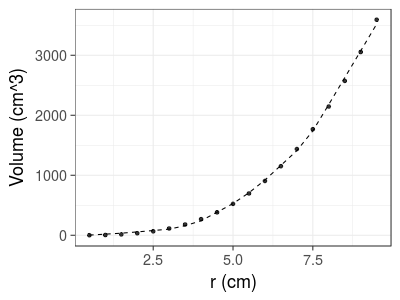

In [91]:
%%R -w 400 -h 300 -i df
p = ggplot(df)
p = p + geom_point(aes(x=radius, y=volume), alpha=0.8)
p = p + geom_line(aes(x=radius, y=pred_volume), linetype="dashed")
p = p + theme_bw(base_size=18) + xlab("r (cm)") + ylab("Volume (cm^3)")
print(p)

In [104]:
# check extrapolation
radius = torch.FloatTensor(torch.arange(0.5, 25, 1))
radius.unsqueeze_(1)
volume = 4.0 / 3.0 * 3.142 * radius**3
pred = net(Variable(radius))
pred_volume = pred.data

df = pd.DataFrame(
    {
        "radius": radius.squeeze(1).numpy(),
        "volume": volume.squeeze(1).numpy(),
        "pred_volume": pred_volume.squeeze(1).numpy()
    }
)

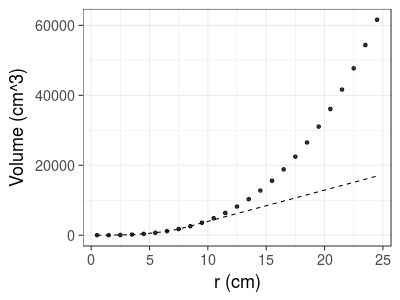

In [105]:
%%R -w 400 -h 300 -i df
p = ggplot(df)
p = p + geom_point(aes(x=radius, y=volume), alpha=0.8)
p = p + geom_line(aes(x=radius, y=pred_volume), linetype="dashed")
p = p + theme_bw(base_size=18) + xlab("r (cm)") + ylab("Volume (cm^3)")
print(p)

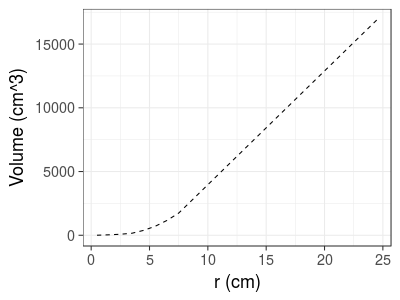

In [106]:
%%R -w 400 -h 300 -i df
p = ggplot(df)
#p = p + geom_point(aes(x=radius, y=volume), alpha=0.8)
p = p + geom_line(aes(x=radius, y=pred_volume), linetype="dashed")
p = p + theme_bw(base_size=18) + xlab("r (cm)") + ylab("Volume (cm^3)")
print(p)

In [95]:
# check transform
radius = torch.FloatTensor(torch.arange(0.5, 25, 1))
radius.unsqueeze_(1)
volume = 4.0 / 3.0 * 3.142 * radius**3
pred = net.get_last_layer(Variable(radius))
pred_last = pred.data

df = pd.DataFrame(
    {
        "radius": radius.squeeze(1).numpy(),
        "volume": volume.squeeze(1).numpy(),
        "pred_volume": pred_volume.squeeze(1).numpy()
    }
)

In [96]:
pred_last


    0.2202
    3.9939
    9.2649
   18.7800
   45.5380
   84.0239
  138.1975
  206.4074
  311.6083
  417.6039
  523.5837
  629.5100
  735.4362
  841.3625
  947.2886
 1053.2150
 1159.1411
 1265.0671
 1370.9935
 1476.9197
 1582.8459
 1688.7721
 1794.6984
 1900.6246
 2006.5510
[torch.FloatTensor of size 25x1]

In [97]:
radius**3


 1.2500e-01
 3.3750e+00
 1.5625e+01
 4.2875e+01
 9.1125e+01
 1.6638e+02
 2.7462e+02
 4.2188e+02
 6.1412e+02
 8.5738e+02
 1.1576e+03
 1.5209e+03
 1.9531e+03
 2.4604e+03
 3.0486e+03
 3.7239e+03
 4.4921e+03
 5.3594e+03
 6.3316e+03
 7.4149e+03
 8.6151e+03
 9.9384e+03
 1.1391e+04
 1.2978e+04
 1.4706e+04
[torch.FloatTensor of size 25x1]

In [99]:
list(net.parameters())

[Parameter containing:
  1.3030
 -0.1970
  0.4840
 -0.9703
  0.8802
  0.4899
  0.2686
 -0.4539
 -0.5226
  1.1552
 [torch.FloatTensor of size 10x1], Parameter containing:
 -4.1444
 -0.7543
  1.4439
 -0.7048
 -6.4115
 -2.7536
  0.7750
  0.6747
  0.1731
 -0.5743
 [torch.FloatTensor of size 10], Parameter containing:
  2.5316 -0.1109 -0.7895  0.1539  3.5089  1.7224 -0.5582 -0.2297  0.2946  0.4520
  0.1217  0.1627  0.1946  0.2477 -0.3073 -0.0476  0.0967 -0.3013 -0.2173 -0.1856
 -0.0204 -0.2409 -0.0872  0.1502 -0.1292 -0.0525  0.0147 -0.0411  0.0531  0.0209
  1.3774  0.1162 -0.8563  0.1485  2.6772  1.2523 -0.3815 -0.0579  0.0030  0.0074
 -0.1917 -0.2618  0.2290 -0.2982 -0.3147 -0.0552  0.1203 -0.1619  0.2012 -0.0245
  2.0575  0.2065 -0.8348 -0.3075  3.2913  1.1247 -0.3678  0.2569  0.0110 -0.0303
  1.9648  0.1855  0.0259  0.0471  2.4756  0.8106  0.1694  0.2220 -0.1620  1.0038
  1.2784 -0.1069 -0.1807 -0.1907  1.7506  0.9404 -0.0218 -0.1046  0.2951  0.5538
 -0.2653  0.2500 -0.1911 -0.2109 -0.1

In [103]:
4/3 * 3.142 *2

8.378666666666666